In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')


def formattingStyle():
    # This will change to your computer's default Times New Roman font
    plt.rcParams["font.family"] = "Calibri"
    
    # setting the font size
    SMALL_SIZE = 12
    MEDIUM_SIZE = 12
    BIGGER_SIZE = 12

    plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
    plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
    plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
    plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

    # set the style of the plots
    sns.set_style("white",  {'axes.edgecolor': '0.0', 'axes.linewidth': 0.1, 'grid.color': '.9'}) 

    # set the color palette
    sns.set_palette("RdPu")

    pd.options.display.float_format = '{:,.2f}'.format

formattingStyle()

# color of the graphs 

color = 'deeppink'
text_color = 'dimgray'

# Setting

In [2]:
try:
    from google.colab import drive
    colab = True
    drive.mount('/content/drive')
    data_path = '/content/drive/Shared drives/MSD 23 Drive/Datasets'
    output_path = '/content/drive/Shared drives/MSD 23 Drive/Figures'
except:
    colab = False
    data_path = './MSD Datathon Files/Datasets/'
    output_path = './MSD Datathon Report/figures/'

print('Data path: ', data_path)
print('Output path: ', output_path)

if colab: 
    !pip install -U kaleido

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Data path:  /content/drive/Shared drives/MSD 23 Drive/Datasets
Output path:  /content/drive/Shared drives/MSD 23 Drive/Figures
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
# load data
df_treatments = pd.read_csv(os.path.join(data_path, 'treatments_2017-2020.csv'))

print(df_treatments.shape)
df_treatments.head(2)

(4049136, 82)


,REASON,FRSTUSE2,EMPLOY_D,MARSTAT,PRIMINC,TRNQFLG,NOPRIOR,PREG,METHUSE,FRSTUSE3,...,METHFLG,FREQ3,CASEID,OTHERFLG,cbsatitle,metropolitanmicropolitanstatis,countycountyequivalent,statename,fipscountycode,centraloutlyingcounty
0,6,-9,1,-9,-9,0,0,2,1,-9,...,0,-9,20171463590,0,"San Luis Obispo-Paso Robles-Arroyo Grande, CA",Metropolitan Statistical Area,San Luis Obispo County,California,79,Central
1,4,6,4,-9,-9,0,1,1,1,-9,...,0,-9,20171390962,0,"Chico, CA",Metropolitan Statistical Area,Butte County,California,7,Central


In [4]:
# drop if age 1 or 2  (only look at adult population)
df_treatments = df_treatments[df_treatments['AGE'] > 2]

In [5]:
# save in .tex number of observations
rows = df_treatments.shape[0]

with open(os.path.join(output_path, 'treatment_rows.tex'), 'w') as f:
    f.write(str(rows))

In [6]:
df_treatments.columns

Index(['REASON', 'FRSTUSE2', 'EMPLOY_D', 'MARSTAT', 'PRIMINC', 'TRNQFLG',
       'NOPRIOR', 'PREG', 'METHUSE', 'FRSTUSE3', 'DETNLF_D', 'FREQ2', 'SUB2',
       'INHFLG', 'SUB1_D', 'ALCDRUG', 'SERVICES', 'AGE', 'ETHNIC',
       'SERVICES_D', 'DETNLF', 'PRIMPAY', 'HERFLG', 'IDU', 'REGION', 'LOS',
       'FREQ_ATND_SELF_HELP_D', 'SEDHPFLG', 'SUB3', 'BENZFLG', 'OPSYNFLG',
       'FREQ3_D', 'ALCFLG', 'SUB2_D', 'OTCFLG', 'HLTHINS', 'DIVISION',
       'GENDER', 'STFIPS', 'ROUTE3', 'FRSTUSE1', 'AMPHFLG', 'PCPFLG',
       'PSOURCE', 'COKEFLG', 'MTHAMFLG', 'SUB3_D', 'DAYWAIT', 'CBSA',
       'PSYPROB', 'RACE', 'ROUTE1', 'DETCRIM', 'VET', 'ARRESTS_D', 'MARFLG',
       'FREQ1_D', 'STIMFLG', 'LIVARAG_D', 'FREQ1', 'SUB1', 'DISYR', 'BARBFLG',
       'EMPLOY', 'LIVARAG', 'FREQ2_D', 'HALLFLG', 'ROUTE2', 'ARRESTS',
       'FREQ_ATND_SELF_HELP', 'EDUC', 'DSMCRIT', 'METHFLG', 'FREQ3', 'CASEID',
       'OTHERFLG', 'cbsatitle', 'metropolitanmicropolitanstatis',
       'countycountyequivalent', 'statename', '

In [7]:
# replace missing values (-9) with np.nan
df_treatments.replace(-9, np.nan, inplace=True)

In [8]:
# check for missing values 

missings = df_treatments.isnull().sum()
display((missings[missings > 0]/ df_treatments.shape[0] * 100).sort_values(ascending=False))
del missings


FREQ3_D                 82.33
DETCRIM                 81.36
DETNLF_D                78.09
FREQ3                   77.95
FRSTUSE3                77.23
ROUTE3                  76.98
DETNLF                  71.85
PREG                    68.50
FREQ2_D                 65.90
PRIMPAY                 65.81
HLTHINS                 60.22
DAYWAIT                 50.37
FRSTUSE2                43.60
FREQ2                   42.80
ROUTE2                  42.67
PRIMINC                 36.80
IDU                     33.28
DSMCRIT                 30.75
FREQ1_D                 26.84
FREQ_ATND_SELF_HELP_D   20.60
FREQ_ATND_SELF_HELP     20.46
MARSTAT                 19.66
LIVARAG_D               16.60
ARRESTS_D               16.50
EMPLOY_D                15.86
PSYPROB                 14.72
SUB3                    11.77
ARRESTS                  8.83
NOPRIOR                  8.79
METHUSE                  8.46
SUB1_D                   8.17
FREQ1                    7.50
VET                      5.57
SUB3_D    

# TEDS

In [9]:
# assign value labels to SERVICES 
services_dict = {1 : 'Detox, 24-hour, hospital inpatient',
                    2 : 'Detox, 24-hour, free-standing residential',
                    3 : 'Rehab/residential, hospital (non-detox)',
                    4 : 'Rehab/residential, short term (30 days or fewer)',
                    5 : 'Rehab/residential, long term (more than 30 days)',
                    6 : 'Ambulatory, intensive outpatient',
                    7 : 'Ambulatory, non-intensive outpatient',
                    8 : 'Ambulatory, detoxification'}

df_treatments['SERVICES'] = df_treatments['SERVICES'].map(services_dict)
df_treatments['SERVICES_D'] = df_treatments['SERVICES_D'].map(services_dict)


hlthins_dict = {1 : 'Private insurance, Blue Cross/Blue Shield, HMO',
                    2 : 'Medicaid',
                    3 : 'Medicare, other (e.g. TRICARE, CHAMPUS)',
                    4 : 'None',
                    -9 : 'Missing'}

df_treatments['HLTHINS'] = df_treatments['HLTHINS'].map(hlthins_dict)

age_dict = {1 : '12-14 years old',
                    2 : '15-17 years old',
                    3 : '18-20 years old',
                    4 : '21-24 years old',
                    5 : '25-29 years old',
                    6 : '30-34 years old',
                    7 : '35-39 years old',
                    8 : '40-44 years old',
                    9 : '45-49 years old',
                    10 : '50-54 years old',
                    11 : '55-64 years old',
                    12 : '65 years and older'}

df_treatments['AGE'] = df_treatments['AGE'].map(age_dict)

race_dict = {1 : 'Other',
                    2 : 'Other',
                    3 : 'Asian',
                    4 : 'Black',
                    5 : 'White',
                    6 : 'Asian',
                    7 : 'Other', 
                    8 : 'Other',
                    9 : 'Other',
                    -9 : 'Missing'}

df_treatments['RACE'] = df_treatments['RACE'].map(race_dict)  

marstat_dict = {1 : 'Never married',
                    2 : 'Now married',
                    3 : 'Separated',
                    4 : 'Divorced, widowed',
                    -9 : 'Missing'}              

df_treatments['MARSTAT'] = df_treatments['MARSTAT'].map(marstat_dict)

reason_dict = {1 : 'Treatment completed',
                    2 : 'Dropped out of treatment',
                    3 : 'Terminated by facility',
                    4 : 'Transferred to another treatment program or facility',
                    5 : 'Incarcerated',
                    6 : 'Death',
                    7 : 'Other',
                    -9 : 'Missing'}

df_treatments['REASON'] = df_treatments['REASON'].map(reason_dict)

# create dummiy variables for REASON

df_treatments = pd.concat([df_treatments, pd.get_dummies(df_treatments['REASON'], prefix='REASON')], axis=1)

PSOURCE_dict = {1 : 'Individual or self-referral',
                    2 : 'Alcohol/drug care provider',
                    3 : 'Other health care provider',
                    4 : 'School',
                    5 : 'Employer or EAP',
                    6 : 'Other community organization',
                    7 : 'Court or criminal justice referral',
                    -9 : 'Missing'}

df_treatments['PSOURCE'] = df_treatments['PSOURCE'].map(PSOURCE_dict)

NOPRIOR_dict = {0 : 'No prior treatment episode',
                    1 : 'One or more prior treatment episodes',
                    -9 : 'Missing'}

df_treatments['NOPRIOR'] = df_treatments['NOPRIOR'].map(NOPRIOR_dict)

daywait_dict = {0 : '0 days',
                    1 : '1-7 days',
                    2 : '8-14 days',
                    3 : '15-30 days',
                    4 : '>31 days',
                    -9 : 'Missing'}

df_treatments['DAYWAIT'] = df_treatments['DAYWAIT'].map(daywait_dict)

gender_dict = { 1 : 'Male', 2 : 'Female'}
df_treatments['GENDER'] = df_treatments['GENDER'].map(gender_dict)

educ_dict = {1 : '8 years or less',
             2 : '9-11 years',
             3 : '12 years (or GED)',
             4 : '13-15 years',
             5 : '16 years or more',}

df_treatments['EDUC'] = df_treatments['EDUC'].map(educ_dict)

employ_dict = {1 : 'Full time',
                2 : 'Part time',    
                3 : 'Unemployed',
                4 : 'Not in labor force',
                -9 : 'Missing'}

df_treatments['EMPLOY'] = df_treatments['EMPLOY'].map(employ_dict)

In [10]:
# df_treatments[df_treatments['statename'] == 'Arizona'].value_counts('REASON')

In [11]:
# create an indicator for detox 

df_treatments['DETOX'] = np.where((df_treatments['SERVICES'] == 'Detox, 24-hour, hospital inpatient') |
                                  (df_treatments['SERVICES'] == 'Detox, 24-hour, free-standing residential') |
                                  (df_treatments['SERVICES'] == 'Ambulatory, detoxification'), 1, 0) 

# create an indicator for rehab

df_treatments['REHAB'] = np.where((df_treatments['SERVICES'] == 'Rehab/residential, hospital (non-detox)') |
                                    (df_treatments['SERVICES'] == 'Rehab/residential, short term (30 days or fewer)') |
                                    (df_treatments['SERVICES'] == 'Rehab/residential, long term (more than 30 days)'), 1, 0)
    
# create a column rehab, detox, else 

df_treatments['SERVICES_TYPE_BROAD'] = 0 + df_treatments['DETOX'] + df_treatments['REHAB']*2

SERVICES_TYPE_BROAD_dict = {0 : 'Other',
                    1 : 'Detox',
                    2 : 'Rehab' }

df_treatments['SERVICES_TYPE_BROAD'] = df_treatments['SERVICES_TYPE_BROAD'].map(SERVICES_TYPE_BROAD_dict)

df_treatments['SERVICES_TYPE_BROAD'].value_counts()

Other    2300563
Detox     856763
Rehab     783837
Name: SERVICES_TYPE_BROAD, dtype: int64

In [12]:
# create an indicator for detox 

df_treatments['DETOX_D'] = np.where((df_treatments['SERVICES_D'] == 'Detox, 24-hour, hospital inpatient') |
                                  (df_treatments['SERVICES_D'] == 'Detox, 24-hour, free-standing residential') |
                                  (df_treatments['SERVICES_D'] == 'Ambulatory, detoxification'), 1, 0) 

# create an indicator for rehab

df_treatments['REHAB_D'] = np.where((df_treatments['SERVICES_D'] == 'Rehab/residential, hospital (non-detox)') |
                                    (df_treatments['SERVICES_D'] == 'Rehab/residential, short term (30 days or fewer)') |
                                    (df_treatments['SERVICES_D'] == 'Rehab/residential, long term (more than 30 days)'), 1, 0)
    
# create a column rehab, detox, else 

df_treatments['SERVICES_TYPE_BROAD_D'] = 0 + df_treatments['DETOX_D'] + df_treatments['REHAB_D']*2

SERVICES_TYPE_BROAD_dict = {0 : 'Other',
                    1 : 'Detox',
                    2 : 'Rehab' }

df_treatments['SERVICES_TYPE_BROAD_D'] = df_treatments['SERVICES_TYPE_BROAD_D'].map(SERVICES_TYPE_BROAD_dict)

df_treatments['SERVICES_TYPE_BROAD_D'].value_counts()

Other    2309733
Detox     841943
Rehab     789487
Name: SERVICES_TYPE_BROAD_D, dtype: int64

In [13]:
# crosstab of services type broad and services

pd.crosstab(df_treatments['SERVICES_TYPE_BROAD'], df_treatments['SERVICES'])


SERVICES,"Ambulatory, detoxification","Ambulatory, intensive outpatient","Ambulatory, non-intensive outpatient","Detox, 24-hour, free-standing residential","Detox, 24-hour, hospital inpatient","Rehab/residential, hospital (non-detox)","Rehab/residential, long term (more than 30 days)","Rehab/residential, short term (30 days or fewer)"
SERVICES_TYPE_BROAD,,,,,,,,
Detox,42787,0,0,688165,125811,0,0,0
Other,0,586104,1714459,0,0,0,0,0
Rehab,0,0,0,0,0,9931,306619,467287


In [14]:
df_treatments['SUCCESS'] = df_treatments['REASON'].apply(lambda x: 1 if x == 'Treatment completed' else 0)

success_dict = {0 : 'Unsuccessful',
                    1 : 'Successful'}

df_treatments['SUCCESS'] = df_treatments['SUCCESS'].map(success_dict)

In [15]:
df_treatments[df_treatments['statename'] == 'Washington'].value_counts('DISYR') 

DISYR
2017    6136
2020    3596
dtype: int64

# **Visualization**

---

## Treatment characteristics

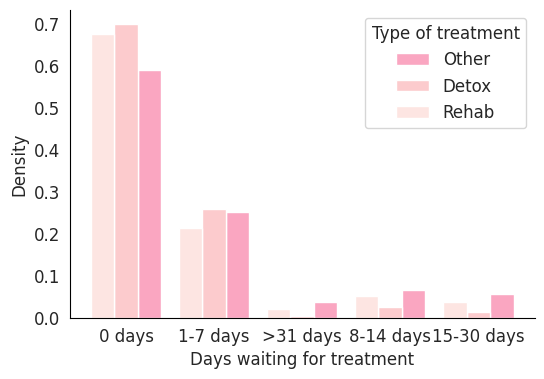

In [16]:
# visualize the distribution of days waiting for treatment by rehab and detox if not missing as shares of the groups 

fig, ax = plt.subplots( figsize=(6, 4))

ax= sns.histplot(x = df_treatments['DAYWAIT'], hue=df_treatments['SERVICES_TYPE_BROAD'], multiple="dodge", 
                  stat = 'density', shrink = 0.8, common_norm=False)
# rename the x axis
ax.set(xlabel='Days waiting for treatment')
# rename the legend
ax.legend(title='Type of treatment', loc='upper right', labels=['Other', 'Detox', 'Rehab'])
# no right and upper spines 
sns.despine()

name = 'daywait.pdf'
file = os.path.join(output_path, name)
plt.savefig(file, dpi=300, bbox_inches='tight')

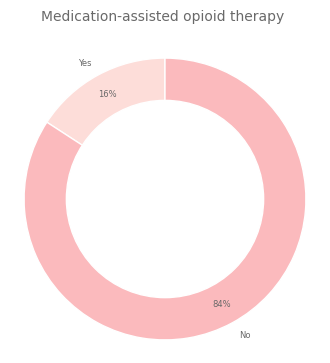

In [17]:

fig, ax = plt.subplots( figsize=(4, 4))

var = 'METHUSE'
# age as donut chart
df_temp = df_treatments.groupby(var).size().reset_index(name='counts')
# create a list of labels
labels = ['Yes', 'No']
# create a list of values
values = df_temp['counts'].tolist()
# create a list of explode
explode = [0.1 if values[i] == max(values) else 0 for i in range(0, len(values))]
# plot the donut chart
ax.pie(values, labels=labels, autopct='%1.0f%%', startangle=90, pctdistance=0.85)
circle = plt.Circle( (0, 0), 0.7, color='white')
# add the circle to the plot 
ax.add_artist(circle)
# size of labels 6pt
for text in ax.texts:
    text.set_fontsize(6)
    text.set_color('dimgray')
# labels inside the circle
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
# Add title to the plot age 
ax.set_title('Medication-assisted opioid therapy \n', fontsize=10, color='dimgray')

name = 'med_assist.pdf'
file = os.path.join(output_path, name)
plt.savefig(file, dpi=300, bbox_inches='tight')

In [18]:
df_treatments['DAYWAIT'].value_counts()

0 days        1297993
1-7 days       455728
8-14 days       93981
15-30 days      69328
>31 days        39031
Name: DAYWAIT, dtype: int64

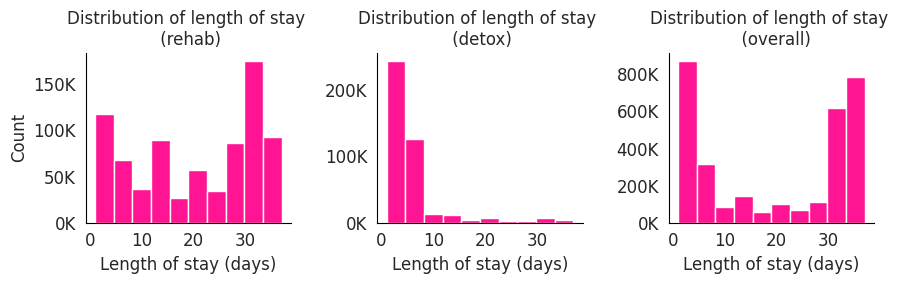

In [19]:
# distribution of days waiting for treatment
fig, ax = plt.subplots(1, 3,  figsize=(9, 3))

ax[0].hist(df_treatments[df_treatments['SERVICES_TYPE_BROAD'] == 'Rehab']['LOS'], color = color)
ax[0].set_xlabel('Length of stay (days)')
ax[0].set_ylabel('Count')
ax[0].set_title('Distribution of length of stay \n (rehab)')

# remove the top and right spines
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
# set the yticks to be in k
ax[0].set_yticklabels(['{:,.0f}K'.format(y/1000) for y in ax[0].get_yticks().tolist()])

ax[1].hist(df_treatments[df_treatments['SERVICES_TYPE_BROAD_D'] == 'Detox']['LOS'], color = color)
ax[1].set_xlabel('Length of stay (days)')
ax[1].set_ylabel('Count')
ax[1].set_title('Distribution of length of stay \n (detox)')
# remove the top and right spines
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
# set the yticks to be in k
ax[1].set_yticklabels(['{:,.0f}K'.format(y/1000) for y in ax[1].get_yticks().tolist()])
ax[1].set_ylabel('')

# overall

ax[2].hist(df_treatments['LOS'], color = color)
ax[2].set_xlabel('Length of stay (days)')
ax[2].set_ylabel('Count')
ax[2].set_title('Distribution of length of stay \n  (overall)')
# remove the top and right spines
ax[2].spines['top'].set_visible(False)
ax[2].spines['right'].set_visible(False)
# set the yticks to be in k
ax[2].set_yticklabels(['{:,.0f}K'.format(y/1000) for y in ax[2].get_yticks().tolist()])
ax[2].set_ylabel('')

plt.tight_layout()

name = 'los_rehab_detox.pdf'
file = os.path.join(output_path, name)
plt.savefig(file, dpi=300, bbox_inches='tight')

''

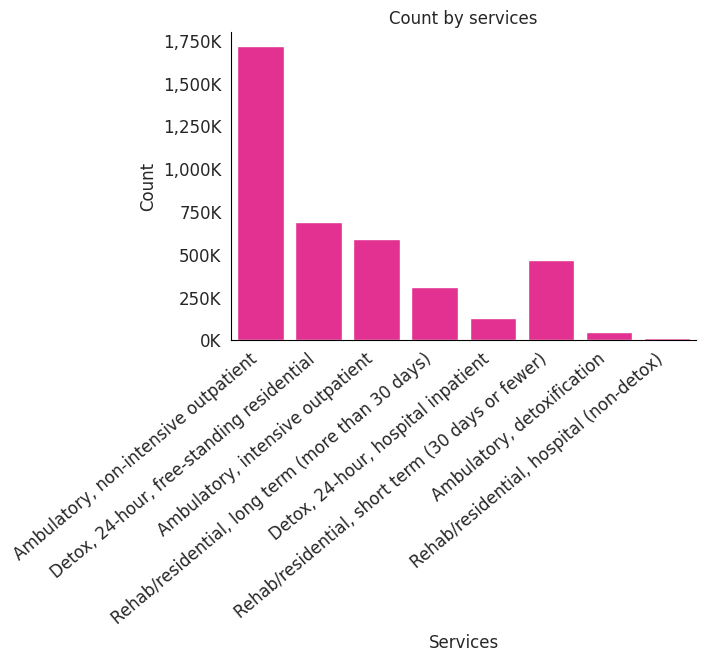

In [20]:
# visualize the count by services
fig, ax = plt.subplots(figsize=(6, 4))

ax = sns.countplot(x="SERVICES", data=df_treatments, color=color)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_xlabel('Services')
ax.set_ylabel('Count')
ax.set_title('Count by services')

# remove the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# set the yticks to be in k
ax.set_yticklabels(['{:,.0f}K'.format(y/1000) for y in ax.get_yticks().tolist()])
    
; 

In [21]:
df_treatments.HLTHINS.value_counts(normalize=True)

Medicaid                                         0.46
None                                             0.37
Private insurance, Blue Cross/Blue Shield, HMO   0.09
Medicare, other (e.g. TRICARE, CHAMPUS)          0.07
Name: HLTHINS, dtype: float64

In [22]:
# sankey diagram of service_d by service

var1 = 'SERVICES_TYPE_BROAD'
var2 = 'SERVICES_TYPE_BROAD_D'
import plotly.graph_objects as go

# create a dataframe with the counts of service_d by service
df_sankey = df_treatments.groupby([var1, var2]).size().reset_index(name='counts')
df_sankey = df_sankey.sort_values([var1, var2])
var1_list = sorted(df_sankey[var1].unique().tolist())
var1_dict = {var1_list[i] : i  for i in range(0, len(var1_list))}

var2_list = sorted(df_sankey[var2].unique().tolist())
var2_dict = {var2_list[i] : i + max(var1_dict.values()) +1 for i in range(0, len(var2_list))}

df_sankey[f"{var1}_id"] = df_sankey[var1].map(var1_dict)
df_sankey[f"{var2}_id"] = df_sankey[var2].map(var2_dict)


source = df_sankey[f"{var1}_id"].tolist()
target = df_sankey[f"{var2}_id"].tolist()
value = df_sankey['counts'].tolist()
fig = go.Figure(data=[go.Sankey(
    node = dict(
        pad = 15,
        thickness = 20,
        line = dict(color = "black", width = 0.5),
        label = var1_list + var2_list,
        color =color
    ),
    link = dict(
        source = source, 
        target = target,
        value = value
    ))])

del df_sankey
fig.show()

name = 'sankey_service.pdf'
file = os.path.join(output_path, name)
plt.savefig(file, dpi=300, bbox_inches='tight')

<Figure size 640x480 with 0 Axes>

In [23]:
# sankey diagram of service_d by service

var1 = 'SERVICES_TYPE_BROAD'
var2 = 'SUCCESS'
import plotly.graph_objects as go

# create a dataframe with the counts of service_d by service
df_sankey = df_treatments.groupby([var1, var2]).size().reset_index(name='counts')
df_sankey = df_sankey.sort_values([var1, var2])
var1_list = sorted(df_sankey[var1].unique().tolist())
var1_dict = {var1_list[i] : i  for i in range(0, len(var1_list))}

var2_list = sorted(df_sankey[var2].unique().tolist())
var2_dict = {var2_list[i] : i + max(var1_dict.values()) +1 for i in range(0, len(var2_list))}

df_sankey[f"{var1}_id"] = df_sankey[var1].map(var1_dict)
df_sankey[f"{var2}_id"] = df_sankey[var2].map(var2_dict)


source = df_sankey[f"{var1}_id"].tolist()
target = df_sankey[f"{var2}_id"].tolist()
value = df_sankey['counts'].tolist()
fig = go.Figure(data=[go.Sankey(
    node = dict(
        pad = 15,
        thickness = 20,
        line = dict(color = "black", width = 0.5),
        label = var1_list + var2_list,
        color = color
    ),
    link = dict(
        source = source, 
        target = target,
        value = value
    ))])



del df_sankey
fig.show()


name = 'sankey_service_success.pdf'
file = os.path.join(output_path, name)
fig.write_image(file)

## Patient characteristics

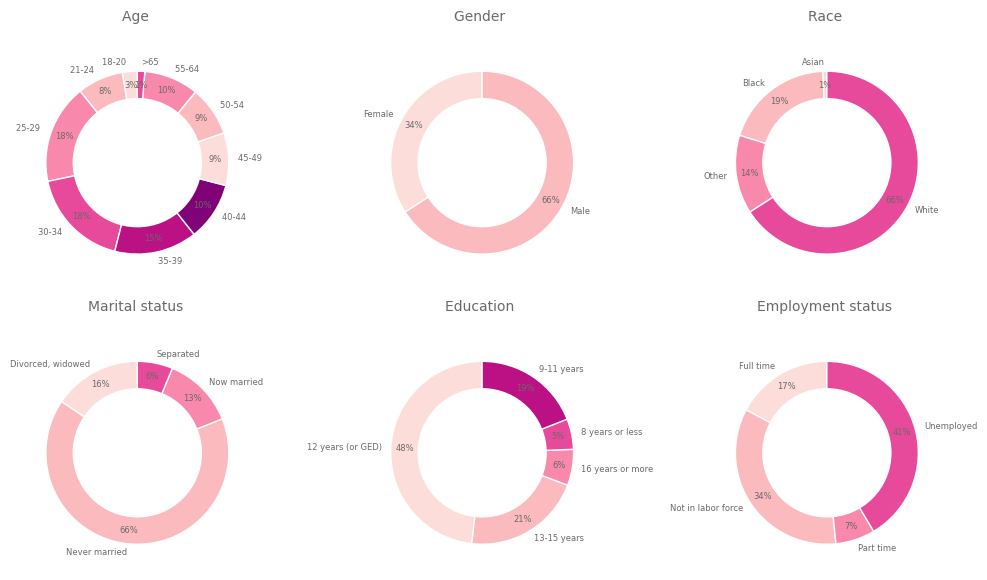

In [24]:
color_text = 'dimgray'

# patient characteristics 'AGE','GENDER', 'RACE', 'ETHNIC', 'MARSTAT', 'EDUC', 'EMPLOY' in one graph as donut chart or bar chart

fig, ax = plt.subplots(2, 3, figsize=(10, 6))

var = 'AGE'
# age as donut chart
df_temp = df_treatments.groupby(var).size().reset_index(name='counts')
# create a list of labels
labels = df_temp[var].tolist()
# remove 'years old' from the labels
labels = [label.replace('years old', '') for label in labels]
labels = [label.replace('65 years and older', '>65') for label in labels]
# create a list of values
values = df_temp['counts'].tolist()
# create a list of explode
explode = [0.1 if values[i] == max(values) else 0 for i in range(0, len(values))]
# plot the donut chart
ax[0, 0].pie(values, labels=labels, autopct='%1.0f%%', startangle=90, pctdistance=0.85)
circle = plt.Circle( (0,0), 0.7, color='white')
# add the circle to the plot
ax[0, 0].add_artist(circle)
# size of labels 6pt
for text in ax[0, 0].texts:
    text.set_fontsize(6)
    text.set_color('dimgray')
# labels inside the circle
ax[0, 0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
# Add title to the plot age 
ax[0, 0].set_title('Age \n', fontsize=10, color=color_text)



# Gender as donut chart
var = 'GENDER'
# age as donut chart
df_temp = df_treatments.groupby(var).size().reset_index(name='counts')
# create a list of labels
labels = df_temp[var].tolist()
# create a list of values
values = df_temp['counts'].tolist()
# create a list of explode
explode = [0.1 if values[i] == max(values) else 0 for i in range(0, len(values))]
# plot the donut chart
ax[0, 1].pie(values, labels=labels, autopct='%1.0f%%', startangle=90, pctdistance=0.85)
circle = plt.Circle( (0, 0), 0.7, color='white')
# add the circle to the plot 
ax[0, 1].add_artist(circle)
# size of labels 6pt
for text in ax[0, 1].texts:
    text.set_fontsize(6)
    text.set_color('dimgray')
# labels inside the circle
ax[0, 1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
# Add title to the plot age 
ax[0, 1].set_title('Gender \n', fontsize=10, color=color_text)


# Gender as donut chart
var = 'RACE'
# age as donut chart
df_temp = df_treatments.groupby(var).size().reset_index(name='counts')
# create a list of labels
labels = df_temp[var].tolist()
# create a list of values
values = df_temp['counts'].tolist()
# create a list of explode
explode = [0.1 if values[i] == max(values) else 0 for i in range(0, len(values))]
# plot the donut chart
ax[0, 2].pie(values, labels=labels, autopct='%1.0f%%', startangle=90, pctdistance=0.85)
circle = plt.Circle( (0, 0), 0.7, color='white')
# add the circle to the plot 
ax[0, 2].add_artist(circle)
# size of labels 6pt
for text in ax[0, 2].texts:
    text.set_fontsize(6)
    text.set_color('dimgray')
# labels inside the circle
ax[0, 2].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
# Add title to the plot age 
ax[0, 2].set_title('Race \n', fontsize=10, color=color_text)


# Marital status as donut chart
var = 'MARSTAT'
# age as donut chart
df_temp = df_treatments.groupby(var).size().reset_index(name='counts')
# create a list of labels
labels = df_temp[var].tolist()
# create a list of values
values = df_temp['counts'].tolist()
# create a list of explode
explode = [0.1 if values[i] == max(values) else 0 for i in range(0, len(values))]
# plot the donut chart
ax[1, 0].pie(values, labels=labels, autopct='%1.0f%%', startangle=90, pctdistance=0.85)
circle = plt.Circle( (0, 0), 0.7, color='white')
# add the circle to the plot 
ax[1, 0].add_artist(circle)
# size of labels 6pt
for text in ax[1, 0].texts:
    text.set_fontsize(6)
    text.set_color('dimgray')
# labels inside the circle
ax[1, 0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
# Add title to the plot age 
ax[1, 0].set_title('Marital status \n', fontsize=10, color=color_text)


# Marital status as donut chart
var = 'EDUC'
# age as donut chart
df_temp = df_treatments.groupby(var).size().reset_index(name='counts')
# create a list of labels
labels = df_temp[var].tolist()
# create a list of values
values = df_temp['counts'].tolist()
# create a list of explode
explode = [0.1 if values[i] == max(values) else 0 for i in range(0, len(values))]
# plot the donut chart
ax[1, 1].pie(values, labels=labels, autopct='%1.0f%%', startangle=90, pctdistance=0.85)
circle = plt.Circle( (0, 0), 0.7, color='white')
# add the circle to the plot 
ax[1, 1].add_artist(circle)
# size of labels 6pt
for text in ax[1, 1].texts:
    text.set_fontsize(6)
    text.set_color('dimgray')
# labels inside the circle
ax[1, 1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
# Add title to the plot age 
ax[1, 1].set_title('Education \n', fontsize=10, color=color_text)

# Marital status as donut chart
var = 'EMPLOY'
# age as donut chart
df_temp = df_treatments.groupby(var).size().reset_index(name='counts')
# create a list of labels
labels = df_temp[var].tolist()
# create a list of values
values = df_temp['counts'].tolist()
# create a list of explode
explode = [0.1 if values[i] == max(values) else 0 for i in range(0, len(values))]
# plot the donut chart
ax[1, 2].pie(values, labels=labels, autopct='%1.0f%%', startangle=90, pctdistance=0.85)
circle = plt.Circle( (0, 0), 0.7, color='white')
# add the circle to the plot 
ax[1, 2].add_artist(circle)
# size of labels 6pt
for text in ax[1, 2].texts:
    text.set_fontsize(6)
    text.set_color('dimgray')
# labels inside the circle
ax[1, 2].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
# Add title to the plot age 
ax[1, 2].set_title('Employment status \n', fontsize=10, color=color_text)

plt.tight_layout()
plt.show()

name = 'demographics.pdf'
file = os.path.join(output_path, name)
fig.savefig(file, bbox_inches='tight')

In [25]:
df_treatments[var]

0                   Part time
1          Not in labor force
2                  Unemployed
3          Not in labor force
4          Not in labor force
                  ...        
4049131            Unemployed
4049132             Full time
4049133             Full time
4049134             Full time
4049135            Unemployed
Name: EMPLOY, Length: 3941163, dtype: object

# **Treatment success**
---

In [26]:

us_states_abbrev = {'Alabama': 'AL', 'Alaska': 'AK', 'American Samoa': 'AS', 'Arizona': 'AZ', 'Arkansas': 'AR',
                    'California': 'CA', 'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'District of Columbia': 'DC',
                    'Florida': 'FL', 'Georgia': 'GA', 'Guam': 'GU', 'Hawaii': 'HI', 'Idaho': 'ID',
                    'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS', 'Kentucky': 'KY',
                    'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD', 'Massachusetts': 'MA', 'Michigan': 'MI',
                    'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE',
                    'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM', 'New York': 'NY',
                    'North Carolina': 'NC', 'North Dakota': 'ND', 'Northern Mariana Islands':'MP', 'Ohio': 'OH',
                    'Oklahoma': 'OK', 'Oregon': 'OR', 'Pennsylvania': 'PA', 'Puerto Rico': 'PR', 'Rhode Island': 'RI',
                    'South Carolina': 'SC', 'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT',
                    'Vermont': 'VT', 'Virgin Islands': 'VI', 'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV',
                    'Wisconsin': 'WI', 'Wyoming': 'WY'}

In [27]:
if not colab:
    # how many rows with multiple states
    print(f'The total number of rows is {df_treatments.shape[0]}')
    print(f'The share of rows with multiple states is {df_treatments["statename"].str.contains(",").sum() / df_treatments.shape[0]}')

    #split statename by comma into columns
    df = df_treatments.copy()
    #df['statename'] = df['statename'] .str.replace(', ', '')
    df['statename'] = df['statename'].str.strip('()').str.split(',')
    # create an indicator for multiple states
    df['multiple_states'] = df['statename'].apply(lambda x: len(x) > 1)

    df = df.explode('statename')
    # delete the space if it is in the beginning 
    df['statename'] = df['statename'].str.strip()
    
    print(f"Number of rows with multiple states: {df['statename'].str.contains(',').sum()}")

    df['STATE'] = df['statename'].map(us_states_abbrev)
    df.rename(columns={'DISYR': 'year'}, inplace=True)
    
    # check whcih states are in the dictionary but not in the data
    print(set(us_states_abbrev.keys()) - set(df.statename.unique()) )
    
    # group by state and year 
    df_state_year = df.groupby(['STATE', 'year']).size().reset_index(name='counts')

    # add the mean of reason* variables grouped by state and year   
    vars = [ 'REASON_Death',
        'REASON_Dropped out of treatment', 'REASON_Incarcerated',
        'REASON_Other', 'REASON_Terminated by facility',
        'REASON_Transferred to another treatment program or facility',
        'REASON_Treatment completed', 'SUCCESS']

    df_state_year = pd.concat([df_state_year, df.groupby(['STATE', 'year'])[vars].mean().reset_index()], axis=1)
    df_state_year = df_state_year.T.drop_duplicates().T
    
    # save the dataset 
    name = 'teds_state_year.csv'
    file = os.path.join(data_path, name)
    df_state_year.to_csv(file, index=False)
    
    # only rehab    
    df_rehab = df[df['SERVICES_TYPE_BROAD'] == 'Rehab']
    df_state_year_rehab = df_rehab.groupby(['STATE', 'year']).size().reset_index(name='counts')
    df_state_year_rehab = pd.concat([df_state_year_rehab, df_rehab.groupby(['STATE', 'year'])[vars].mean().reset_index()], axis=1)
    df_state_year_rehab = df_state_year_rehab.T.drop_duplicates().T
    name = 'teds_state_year_rehab.csv'
    file = os.path.join(data_path, name)
    df_state_year_rehab.to_csv(file, index=False)

    # only detox
    df_detox = df[df['SERVICES_TYPE_BROAD'] == 'Detox']
    df_state_year_detox = df_detox.groupby(['STATE', 'year']).size().reset_index(name='counts')
    df_state_year_detox = pd.concat([df_state_year_detox, df_detox.groupby(['STATE', 'year'])[vars].mean().reset_index()], axis=1)
    df_state_year_detox = df_state_year_detox.T.drop_duplicates().T
    name = 'teds_state_year_detox.csv'
    file = os.path.join(data_path, name)
    df_state_year_detox.to_csv(file, index=False)    


In [29]:
# to save space on RAM (in this case copy paste the df_state_year_detox and df_state_year_rehab csv by hand)
if colab:
    
    vars = [ 'REASON_Death',
        'REASON_Dropped out of treatment', 'REASON_Incarcerated',
        'REASON_Other', 'REASON_Terminated by facility',
        'REASON_Transferred to another treatment program or facility',
        'REASON_Treatment completed', 'SUCCESS'] 

    df_treatments =  df_treatments[vars + ['statename', 'DISYR']]

    # how many rows with multiple states
    print(f'The total number of rows is {df_treatments.shape[0]}')
    print(f'The share of rows with multiple states is {df_treatments["statename"].str.contains(",").sum() / df_treatments.shape[0]}')

    #split statename by comma into columns
    df_treatments['statename'] =  df_treatments['statename'].str.strip('()').str.split(',')
    # create an indicator for multiple states
    df_treatments['multiple_states'] =  df_treatments['statename'].apply(lambda x: len(x) > 1)

    df_treatments = df_treatments.explode('statename')
    # delete the space if it is in the beginning 
    df_treatments['statename'] = df_treatments['statename'].str.strip()

    print(f"Number of rows with multiple states: {df_treatments['statename'].str.contains(',').sum()}")

    df_treatments['STATE'] = df_treatments['statename'].map(us_states_abbrev)
    df_treatments.rename(columns={'DISYR': 'year'}, inplace=True)

    # check whcih states are in the dictionary but not in the data
    print(set(us_states_abbrev.keys()) - set(df_treatments.statename.unique()) )

    # group by state and year 
    df_state_year = df_treatments.groupby(['STATE', 'year']).size().reset_index(name='counts')

    # add the mean of reason* variables grouped by state and year   
    df_state_year = pd.concat([df_state_year, df_treatments.groupby(['STATE', 'year'])[vars].mean().reset_index()], axis=1)
    df_state_year = df_state_year.T.drop_duplicates().T

    # save the dataset 
    name = 'teds_state_year.csv'
    file = os.path.join(data_path, name)
    df_state_year.to_csv(file, index=False)


The total number of rows is 3941163
The share of rows with multiple states is 0.3978148074565807
Number of rows with multiple states: 0
{'Guam', 'Virgin Islands', 'Northern Mariana Islands', 'American Samoa'}


# **Appendix**

---

In [ ]:
stop

In [ ]:
# # distribution of days waiting for treatment
# fig, ax = plt.subplots(figsize=(6, 4))

# ax.hist(df_treatments['LOS'], color = color)
# ax.set_xlabel('Length of stay (days)')
# ax.set_ylabel('Count')
# ax.set_title('Distribution of length of stay')

# # remove the top and right spines
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
# # set the yticks to be in k
# ax.set_yticklabels(['{:,.0f}K'.format(y/1000) for y in ax.get_yticks().tolist()])

# plt.tight_layout()

# # distribution of days waiting for treatment
# fig, ax = plt.subplots(figsize=(6, 4))

# ax.hist(df_treatments[df_treatments['SERVICES_TYPE_BROAD_D'] == 'Detox']['LOS'], color = color)
# ax.set_xlabel('Length of stay (days)')
# ax.set_ylabel('Count')
# ax.set_title('Distribution of length of stay (detox)')

# # remove the top and right spines
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
# # set the yticks to be in k
# ax.set_yticklabels(['{:,.0f}K'.format(y/1000) for y in ax.get_yticks().tolist()])

# plt.tight_layout()

# # distribution of days waiting for treatment
# fig, ax = plt.subplots(figsize=(6, 4))

# ax.hist(df_treatments[df_treatments['SERVICES_TYPE_BROAD_D'] == 'Other']['LOS'], color =color)
# ax.set_xlabel('Length of stay (days)')
# ax.set_ylabel('Count')
# ax.set_title('Distribution of length of stay (other)')

# # remove the top and right spines
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
# # set the yticks to be in k
# ax.set_yticklabels(['{:,.0f}K'.format(y/1000) for y in ax.get_yticks().tolist()])

# plt.tight_layout()


# distribution of days waiting for treatment
fig, ax = plt.subplots(figsize=(6, 6))

ax = sns.countplot(x="DAYWAIT", data=df_treatments, color=color)
ax.set_xlabel('Days waiting for treatment')
ax.set_ylabel('Count')
ax.set_title('Distribution of days waiting for treatment')

# remove the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# set the yticks to be in k
ax.set_yticklabels(['{:,.0f}K'.format(y/1000) for y in ax.get_yticks().tolist()])
# rotate the xticks
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()
file = os.path.join(output_path, 'distr_waiting.png')
fig.savefig(file, dpi=300, bbox_inches='tight')


## Treatment success

In [ ]:
# how many rows with multiple states
print(df_treatments.shape[0] )
df_treatments['statename'].str.contains(',').sum()  / df_treatments.shape[0] 

In [ ]:
#split statename by comma into columns
df = df_treatments.copy()
#df['statename'] = df['statename'] .str.replace(', ', '')
df['statename'] = df['statename'].str.strip('()').str.split(',')
# create an indicator for multiple states
df['multiple_states'] = df['statename'].apply(lambda x: len(x) > 1)

df = df.explode('statename')
# delete the space if it is in the beginning 
df['statename'] = df['statename'].str.strip()

In [ ]:
print(f"Number of rows with multiple states: {df['statename'].str.contains(',').sum()}")

In [ ]:
us_states_abbrev = {'Alabama': 'AL', 'Alaska': 'AK', 'American Samoa': 'AS', 'Arizona': 'AZ', 'Arkansas': 'AR',
                    'California': 'CA', 'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'District of Columbia': 'DC',
                    'Florida': 'FL', 'Georgia': 'GA', 'Guam': 'GU', 'Hawaii': 'HI', 'Idaho': 'ID',
                    'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS', 'Kentucky': 'KY',
                    'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD', 'Massachusetts': 'MA', 'Michigan': 'MI',
                    'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE',
                    'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM', 'New York': 'NY',
                    'North Carolina': 'NC', 'North Dakota': 'ND', 'Northern Mariana Islands':'MP', 'Ohio': 'OH',
                    'Oklahoma': 'OK', 'Oregon': 'OR', 'Pennsylvania': 'PA', 'Puerto Rico': 'PR', 'Rhode Island': 'RI',
                    'South Carolina': 'SC', 'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT',
                    'Vermont': 'VT', 'Virgin Islands': 'VI', 'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV',
                    'Wisconsin': 'WI', 'Wyoming': 'WY'}

df['STATE'] = df['statename'].map(us_states_abbrev)
df.rename(columns={'DISYR': 'year'}, inplace=True)


In [ ]:
# check whcih states are in the dictionary but not in the data
set(us_states_abbrev.keys()) - set(df.statename.unique()) 

In [ ]:
# group by state and year 
df_state_year = df.groupby(['STATE', 'year']).size().reset_index(name='counts')

# add the mean of reason* variables grouped by state and year   
vars = [ 'REASON_Death',
       'REASON_Dropped out of treatment', 'REASON_Incarcerated',
       'REASON_Other', 'REASON_Terminated by facility',
       'REASON_Transferred to another treatment program or facility',
       'REASON_Treatment completed', 'SUCCESS', ]

df_state_year = pd.concat([df_state_year, df.groupby(['STATE', 'year'])[vars].mean().reset_index()], axis=1)
df_state_year = df_state_year.T.drop_duplicates().T



In [ ]:
df_state_year_rehab = df.groupby(['STATE', 'year']).size().reset_index(name='counts')
df_state_year_rehab = pd.concat([df_state_year_rehab, df.groupby(['STATE', 'year'])[vars].mean().reset_index()], axis=1)
df_state_year_rehab = df_state_year_rehab.T.drop_duplicates().T

name = 'teds_state_year.csv'
file = os.path.join(data_path, name)
df_state_year_rehab.to_csv(file, index=False)


In [ ]:
df_state_year_detox = df.groupby(['STATE', 'year']).size().reset_index(name='counts')
df_state_year_detox = pd.concat([df_state_year_detox, df.groupby(['STATE', 'year'])[vars].mean().reset_index()], axis=1)
df_state_year_detox = df_state_year_detox.T.drop_duplicates().T

name = 'teds_state_year.csv'
file = os.path.join(data_path, name)
df_state_year_detox.to_csv(file, index=False)

In [ ]:
# save the dataset 

name = 'teds_state_year.csv'
file = os.path.join(data_path, name)
df_state_year.to_csv(file, index=False)